<a href="https://colab.research.google.com/github/VictorFu0717/AI/blob/main/cnn_res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
cnn = ResNet50(include_top=False, input_shape=(224, 224, 3))
cnn.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
# stride=2每次移動2個,有池化的效果,如果size=3會有不公平的現象(棋盤效應),用size=4可以解決這個問題
# 1x1卷積：1.無空間的組合 2.通道（特徵）混成：可以減少計算量

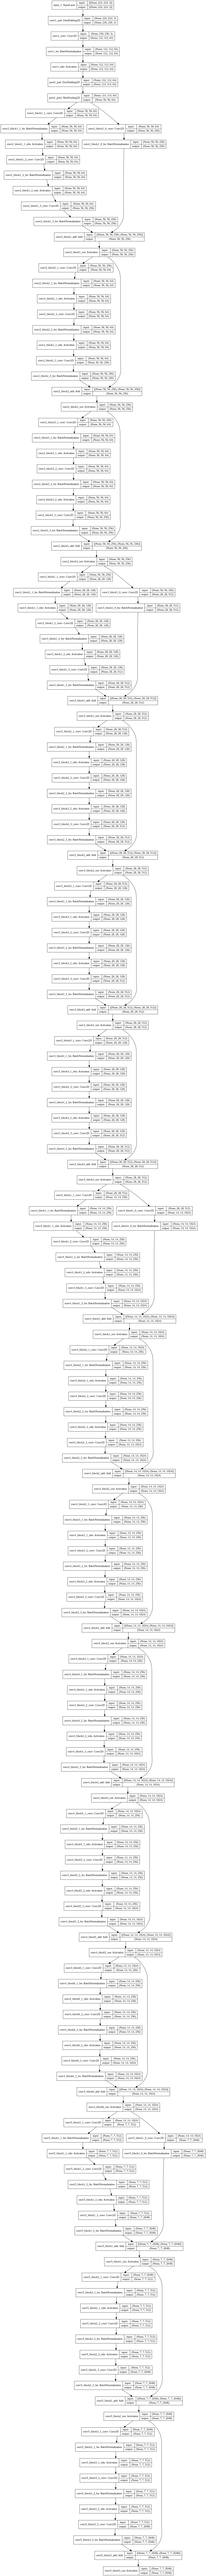

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn, to_file="resv1.png", show_shapes=True)

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
cnn = ResNet50V2(include_top=False, input_shape=(224, 224, 3))
cnn.summary()

94674944/94668760 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________

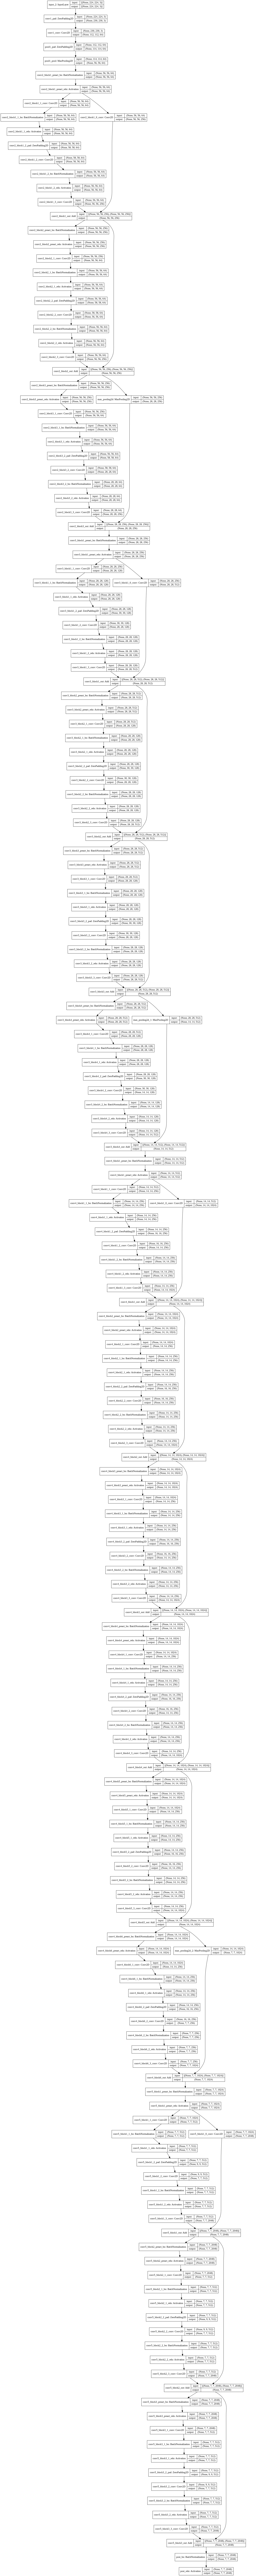

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn, to_file="res.png", show_shapes=True)

In [ ]:
print(len(cnn.layers))

190


In [ ]:
# 1 * 1 加的時候通道樹要一樣 (目標256)
w = cnn.get_layer("conv2_block1_0_conv").get_weights()
w[0].shape

(1, 1, 64, 256)

In [ ]:
# 3 *  = 1 * 1 -> 3 * 3 -> 1 * 1
w = cnn.get_layer("conv2_block1_1_conv").get_weights()
print(w[0].shape)
w = cnn.get_layer("conv2_block1_2_conv").get_weights()
print(w[0].shape)
w = cnn.get_layer("conv2_block1_3_conv").get_weights()
print(w[0].shape)

(1, 1, 64, 64)
(3, 3, 64, 64)
(1, 1, 64, 256)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Add, Input

i = Input(shape=(56, 56, 64))
# 1
x1 = Conv2D(256, 1, padding="same", name="line1")(i)
# 2
x2 = Conv2D(64, 1, activation="relu", name="line2_1")(i)
x2 = Conv2D(64, 3, activation="relu", padding="same", name="line2_2")(x2)
x2 = Conv2D(256, 1, name="line2_3")(x2)
# +
out = Add()([x1, x2])
temp = Model(inputs=i, outputs=out)
temp.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 56, 56, 64)] 0                                            
__________________________________________________________________________________________________
line2_1 (Conv2D)                (None, 56, 56, 64)   4160        input_3[0][0]                    
__________________________________________________________________________________________________
line2_2 (Conv2D)                (None, 56, 56, 64)   36928       line2_1[0][0]                    
__________________________________________________________________________________________________
line1 (Conv2D)                  (None, 56, 56, 256)  16640       input_3[0][0]                    
______________________________________________________________________________________________

In [ ]:
# 3 *  = 1 * 1 -> 3 * 3 -> 1 * 1
w = cnn.get_layer("conv2_block2_1_conv").get_weights()
print(w[0].shape)
w = cnn.get_layer("conv2_block2_2_conv").get_weights()
print(w[0].shape)
w = cnn.get_layer("conv2_block2_3_conv").get_weights()
print(w[0].shape)

(1, 1, 256, 64)
(3, 3, 64, 64)
(1, 1, 64, 256)
